In [ ]:
# Import Librabies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Load Dataset
dataset = pd.read_csv('Student_Performance.csv') # Dataset ini memprediksi kelulusan mahasiswa berdasarkan 2 fitur (Jam belajar & Kehadiran)
x = dataset.iloc[:, [1, 2]].values # x sebagai fitur menangkap data pada index 1 (StudyHours) dan index 2 (Attendance)
y = dataset.iloc[:, -1].values # y sebagai target yang akan menangkap data pada colom terakhir (Passed)

In [ ]:
print (x) # Menampilkan data yang sudah didefinisikan sebagai x (StudyHour & Attendance)

In [ ]:
# Split Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0) # Membagi distribusi dataset menjadi data latih dan data uji secara acak

In [ ]:
print (x_train) # Menampilkan data latih setelah didistribusi

[[  5  91]
 [  4  82]
 [  7  89]
 [  4  79]
 [  6  80]
 [  5  85]
 [  6  69]
 [  3  99]
 [  3  64]
 [  5  64]
 [  3  78]
 [  4  90]
 [  6  65]
 [  1  69]
 [  4  98]
 [  6  88]
 [  1  77]
 [  6  78]
 [  6  69]
 [  7  75]
 [  6  71]
 [  5 100]
 [  8  73]
 [  7  73]
 [  3  83]
 [  3 100]
 [  3  77]
 [  8  96]
 [  3  67]
 [  8  80]
 [  1  69]
 [  6  62]
 [  2  80]
 [  4  65]
 [  4  87]
 [  1  67]
 [  5  82]
 [  7  79]
 [  7  80]
 [  7  70]
 [  5  80]
 [  2  95]
 [  6  75]
 [  3  85]
 [  1  68]
 [  2  72]
 [ 10  72]
 [  5  97]
 [  6  78]
 [  5  81]
 [  3 100]
 [  2  78]
 [  6  71]
 [  2  62]
 [  6  82]
 [  6  59]
 [  7  81]
 [  9  94]
 [  8  87]
 [  7  86]
 [  6  96]
 [  1  64]
 [  5  97]
 [  5  61]
 [  5  83]
 [  3  69]
 [  5  82]
 [  4  70]
 [  4  92]
 [  5  79]
 [  5  69]
 [  3 100]
 [  3  98]
 [  5  80]
 [  6  83]
 [  4  74]
 [  3  74]
 [  5  85]
 [  0  67]
 [  6  72]
 [  3  82]
 [  3  66]
 [  5  74]
 [  6  93]
 [  6  83]
 [  3  70]
 [  0  66]
 [  4  86]
 [  1  77]
 [  2  80]
 [  4  84]

In [ ]:
print (y_test) # Menampilkan data target (passed) setelah didistribusi

[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [ ]:
# Normalisasi Fitur
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Melatih Model
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()                   # latih model dengan Gaussian Naive Bayes karena data yang digunakan berupa numerik
classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
# Prediksi Model
y_pred = classifier.predict(x_test)

In [ ]:
# Evaluasi Model
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print("Tingkat akurasi: {:.2f}%".format(accuracy * 100))

[[  9   1]
 [  1 102]]
Tingkat akurasi: 98.23%


<ipython-input-22-65649b23b597>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


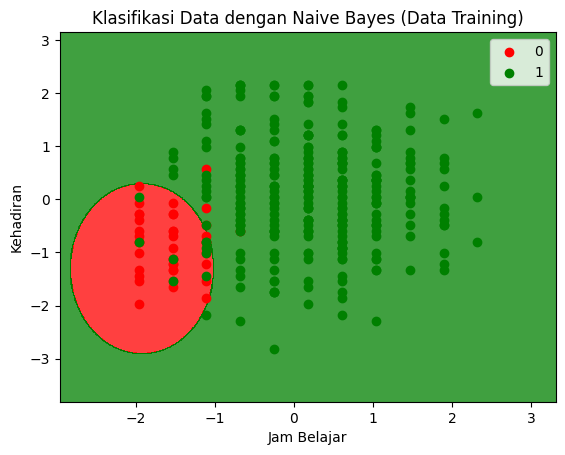

In [ ]:
# Visualisasi Data Training
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
plt.xlabel('Jam Belajar')
plt.ylabel('Kehadiran')
plt.legend()
plt.show()

<ipython-input-23-b9d4f78541cb>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


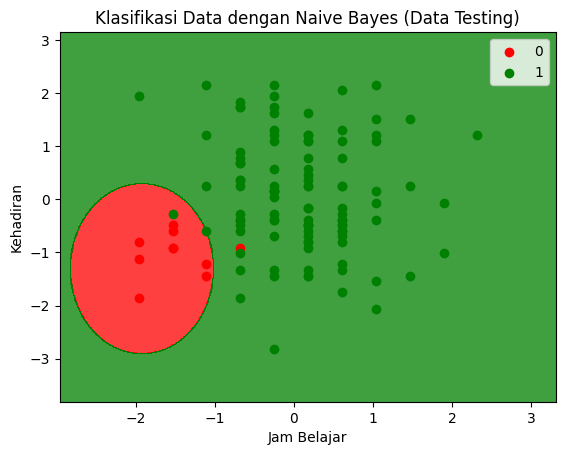

In [ ]:
# Visualisasi Data Testing
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('Klasifikasi Data dengan Naive Bayes (Data Testing)')
plt.xlabel('Jam Belajar')
plt.ylabel('Kehadiran')
plt.legend()
plt.show()


In [ ]:
# Evaluasi Model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.99      0.99      0.99       103

    accuracy                           0.98       113
   macro avg       0.95      0.95      0.95       113
weighted avg       0.98      0.98      0.98       113

